# Clase Nº 6

**Plan de la clase:**  
**(1)** Preguntas sobre la clase asincrónica. <br>
**(2)** Repaso de `pd.DataFrame.merge`. <br>
**(3)** Unir un dataframe con un geodataframe y visualizar atributos en un mapa <br>
**(4)** Unir dos geodataframes en base a atributos espaciales <br>

### Preguntas sobre la clase asincrónica

...

### Repaso de `pd.DataFrame.merge`

In [1]:
import pandas as pd

In [2]:
df1 = [["a", "b", "c", "d"], [1, 2, 3, 4]]
df1 = pd.DataFrame(df1).transpose()
df1

df2 = [["a", "b", "d"], [5, 6, 7]]
df2 = pd.DataFrame(df2).transpose()

df3 = [["a", "b", "c"], [8, 9, 10]]
df3 = pd.DataFrame(df3).transpose()


display(df1)
display(df2)
display(df3)

,0,1
0,a,1
1,b,2
2,c,3
3,d,4


,0,1
0,a,5
1,b,6
2,d,7


,0,1
0,a,8
1,b,9
2,c,10


In [3]:
pd.merge(df1, df2, on=0)

,0,1_x,1_y
0,a,1,5
1,b,2,6
2,d,4,7


In [4]:
df2.merge(df3, how="cross")

,0_x,1_x,0_y,1_y
0,a,5,a,8
1,a,5,b,9
2,a,5,c,10
3,b,6,a,8
4,b,6,b,9
5,b,6,c,10
6,d,7,a,8
7,d,7,b,9
8,d,7,c,10


___

### Unir un geodataframe con un dataframe a través de un atributo no espacial

Vamos a ejemplificar cómo unir un `DataFrame` de Pandas con un `GeoDataFrame` de Geopandas.
Para eso vamos a utilizar una tabla que contiene la población de las distintas provincias argentinas, y el shapefile de las provincias que ya vimos en la clase asincrónica.

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd

Descarguemos la tabla de población por provincia de [esta página](https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2) del sitio del IGN.
Para eso utilizamos la función `read_html` de `Pandas` que es capaz de extraer tablas de un archivo `html`.

In [128]:
url_pob = "https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2"
tablas = pd.read_html(url_pob)

In [129]:
poblacion_df = tablas[2]

In [130]:
poblacion_df

,Jurisdicción,Año 2010,Año 2015,Año 2020
0,República Argentina,40.117.096,43.131.966,45.376.763
1,Ciudad Autónoma de Buenos Aires,2.890.151,3.054.267,3.075.646
2,Buenos Aires,15.625.084,16.659.931,17.541.141
3,Catamarca,367.828,396.895,415.438
4,Chaco,1.055.259,1.143.201,1.204.541
5,Chubut,509.108,566.922,618.994
6,Córdoba,3.308.876,3.567.654,3.760.450
7,Corrientes,992.595,1.070.283,1.120.801
8,Entre Ríos,1.235.994,1.321.415,1.385.961
9,Formosa,530.162,579.250,605.193


Preprocesamos el dataframe de población:

In [131]:
def convertir_a_int(fila, cols=["Año 2010", "Año 2015", "Año 2020"]):    

    '''
    Convertir cols, que contienen strings de números con "." como separador de miles, a tipo entero.
    '''
    
    try:
        for col in cols:
            fila[col] = int(fila[col].replace(".",""))
    except:
        pass
        
    return fila

In [132]:
poblacion_df = poblacion_df.apply(convertir_a_int, axis=1)

___

Ahora carguemos un GeoDataFrame con las provincias de Argentina:

In [133]:
provincias_gdf = gpd.read_file(filename="datos/provincia.zip")
provincias_gdf = provincias_gdf[["nam", "geometry"]]
provincias_gdf

,nam,geometry
0,Ciudad Autónoma de Buenos Aires,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,Neuquén,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,San Luis,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,Santa Fe,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,La Rioja,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."
5,Catamarca,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,Tucumán,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,Chaco,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,Formosa,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,Santa Cruz,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


Examinemos el mapa generado al plotear la geometría asociada a este `GeoDataFrame`.

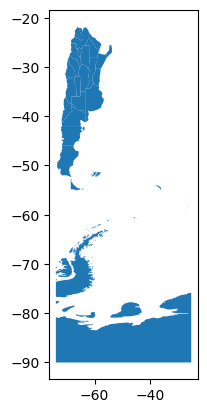

In [42]:
provincias_gdf.plot();

Bounding box para excluir a la Antártida:

In [108]:
xmin, ymin, xmax, ymax = (-75,-60,-40,-55)

Usemos indexado de `GeoDataFrame`s (`gpd.GeoDataFrame.cx`) para seleccionar la fila correspondiente a Tierra del Fuego.

In [110]:
provincias_gdf.cx[xmin:xmax, ymin:ymax]

,nam,geometry,n_poligonos
22,"Tierra del Fuego, Antártida e Islas del Atlánt...","MULTIPOLYGON (((-25.00000 -75.87687, -25.00000...",1402


¿Cómo luce el mapa para esta fila sola?

In [ ]:
provincias_gdf.cx[xmin:xmax, ymin:ymax]

In [61]:
from shapely.geometry.multipolygon import MultiPolygon

In [136]:
TdF_muchos_poligonos = TdF.geometry.explode(index_parts=True)
TdF_muchos_poligonos = TdF_muchos_poligonos.cx[xmin:xmax, ymin:ymax]
TdF_muchos_poligonos = TdF_muchos_poligonos[22].to_list()

In [137]:
TdF_multipol = MultiPolygon(TdF_muchos_poligonos)

### Ejercicio 1

Crear una _bounding box_ similar a la creada para Tierra del Fuego, pero ahora para las Islas Malvinas. Seguir un procedimiento similar al realizado para Tierra del Fuego, finalmente agregar la geometría de las Islas Malvinas al multipolígono de Tierra del Fuego creado anteriormente.

In [ ]:
IM_bounding_box = ( , , , )
xmin, ymin, xmax, ymax = IM_bounding_box

#
#
#
#

TdF_IM_pols = 

### Ejercicio 2

Unir las bases `provincias_gdf` y `poblacion_df` por el nombre de la provincia. Notar que necesitamos especificar `left_on` y `right_on` porque los nombres de las columnas correspondientes son diferentes (o bien cambiar el nombre de una de las columnas).

- Examinar el tipo de objeto que resulta del `merge` usando `provincias_gdf` a la izquierda y `poblacion_df` a la derecha.
- Ídem anterior, con `poblacion_df` a la izquierda y `provincias_gdf` a la derecha.

A continuación, representar un mapa del país coloreando cada provincia en base a su población. Para el merge, usar el orden que (Geo)DataFrame's que corresponda.

In [ ]:
# Por ahora quitemos a Tierra del Fuego, la Antártida y las Islas del Atlántico Sur, para que se vea mejor el mapa
provincias_gdf.drop(22, inplace=True)

### Unir geodatraframes por un atributo espacial: `sjoin`

**Ejercicio:** Leer el shapefile de departamentos como GeoDataFrame. Crear un widget reactivo que permita elegir una provincia y muestre un mapa con la división departamental de la misma.

Geopandas permite unir dos GeoDataFrames en base a relaciones espaciales entre las observaciones (filas) de cada uno.

Vamos a usar estas relaciones espaciales para poder vincular departamentos con provincias.

In [115]:
departamentos_gdf = gpd.read_file("datos/departamento.zip")
departamentos_gdf = departamentos_gdf[["objectid", "nam", "geometry"]]
departamentos_gdf = departamentos_gdf.rename({"nam":"departamento"}, axis=1)

Examinemos este GeoDataFrame. ¿Qué problema nos encontramos?

In [114]:
departamentos_gdf

,objectid,departamento,geometry
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6..."
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0..."
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0..."
3,8268.0,Cushamen,"POLYGON ((-71.17490 -41.99995, -71.05132 -41.9..."
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5..."
...,...,...,...
524,8576.0,Iglesia,"POLYGON ((-69.62981 -28.39369, -69.62956 -28.3..."
525,8577.0,Jáchal,"POLYGON ((-68.25879 -29.74673, -68.26262 -29.7..."
526,8578.0,Valle Fértil,"POLYGON ((-67.99199 -29.97924, -67.99151 -29.9..."
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087..."


___

Obtenemos los centroides de cada departamento para establecer la relación de pertenencia con la provincia.

In [ ]:
departamentos_centroid_gdf = departamentos_gdf.copy()
departamentos_centroid_gdf["geometry"] = departamentos_gdf.geometry.centroid;

In [ ]:
prov_dep_gdf = departamentos_centroid_gdf.sjoin(provincias_gdf, predicate="within")

In [ ]:
prov_dep_df = prov_dep_gdf[["objectid", "provincia"]]

In [ ]:
departamentos_gdf = departamentos_gdf.merge(prov_dep_df, how="inner", on="objectid")

Ahora representamos la división departamental de cada provincia en un mapa.

In [ ]:
def mostrar_deptos_por_provincia(provincia):
    tmp_gdf = departamentos_gdf[departamentos_gdf["provincia"]==provincia]
    tmp_gdf.plot(cmap="tab10", figsize=(10,10))

In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact

In [ ]:
interact(
    mostrar_deptos_por_provincia, 
    provincia=widgets.Dropdown(options=sorted(pd.unique(provincias.nam)))
);